# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("Airlines.csv")

In [3]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [4]:
df["Airline"].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [6]:
df[df["Airline"] == "CO"]

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
5,6,CO,1094,LAX,IAH,3,30,181,1
10,11,CO,223,ANC,SEA,3,49,201,1
17,18,CO,1496,LAS,IAH,3,60,162,0
19,20,CO,507,ONT,IAH,3,75,167,0
...,...,...,...,...,...,...,...,...,...
539177,539178,CO,1803,LAX,EWR,5,1325,298,1
539192,539193,CO,194,OGG,LAX,5,1330,335,0
539357,539358,CO,434,PHX,EWR,5,1420,259,1
539368,539369,CO,208,PDX,IAH,5,1430,227,0


In [7]:
df["Delay"].unique()

array([1, 0], dtype=int64)

In [8]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [9]:
df.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

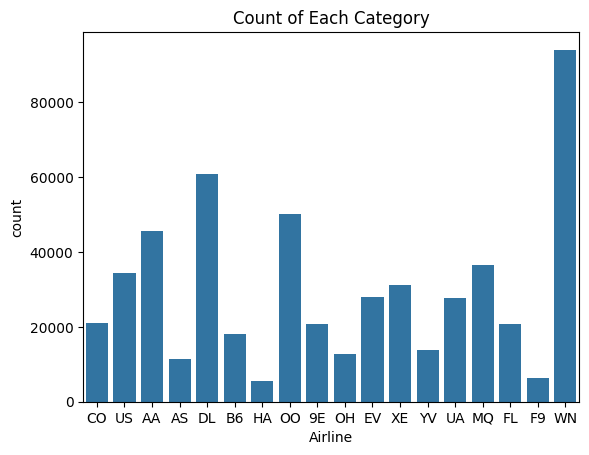

In [10]:
sns.countplot(data=df, x='Airline')
plt.title('Count of Each Category')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='count'>

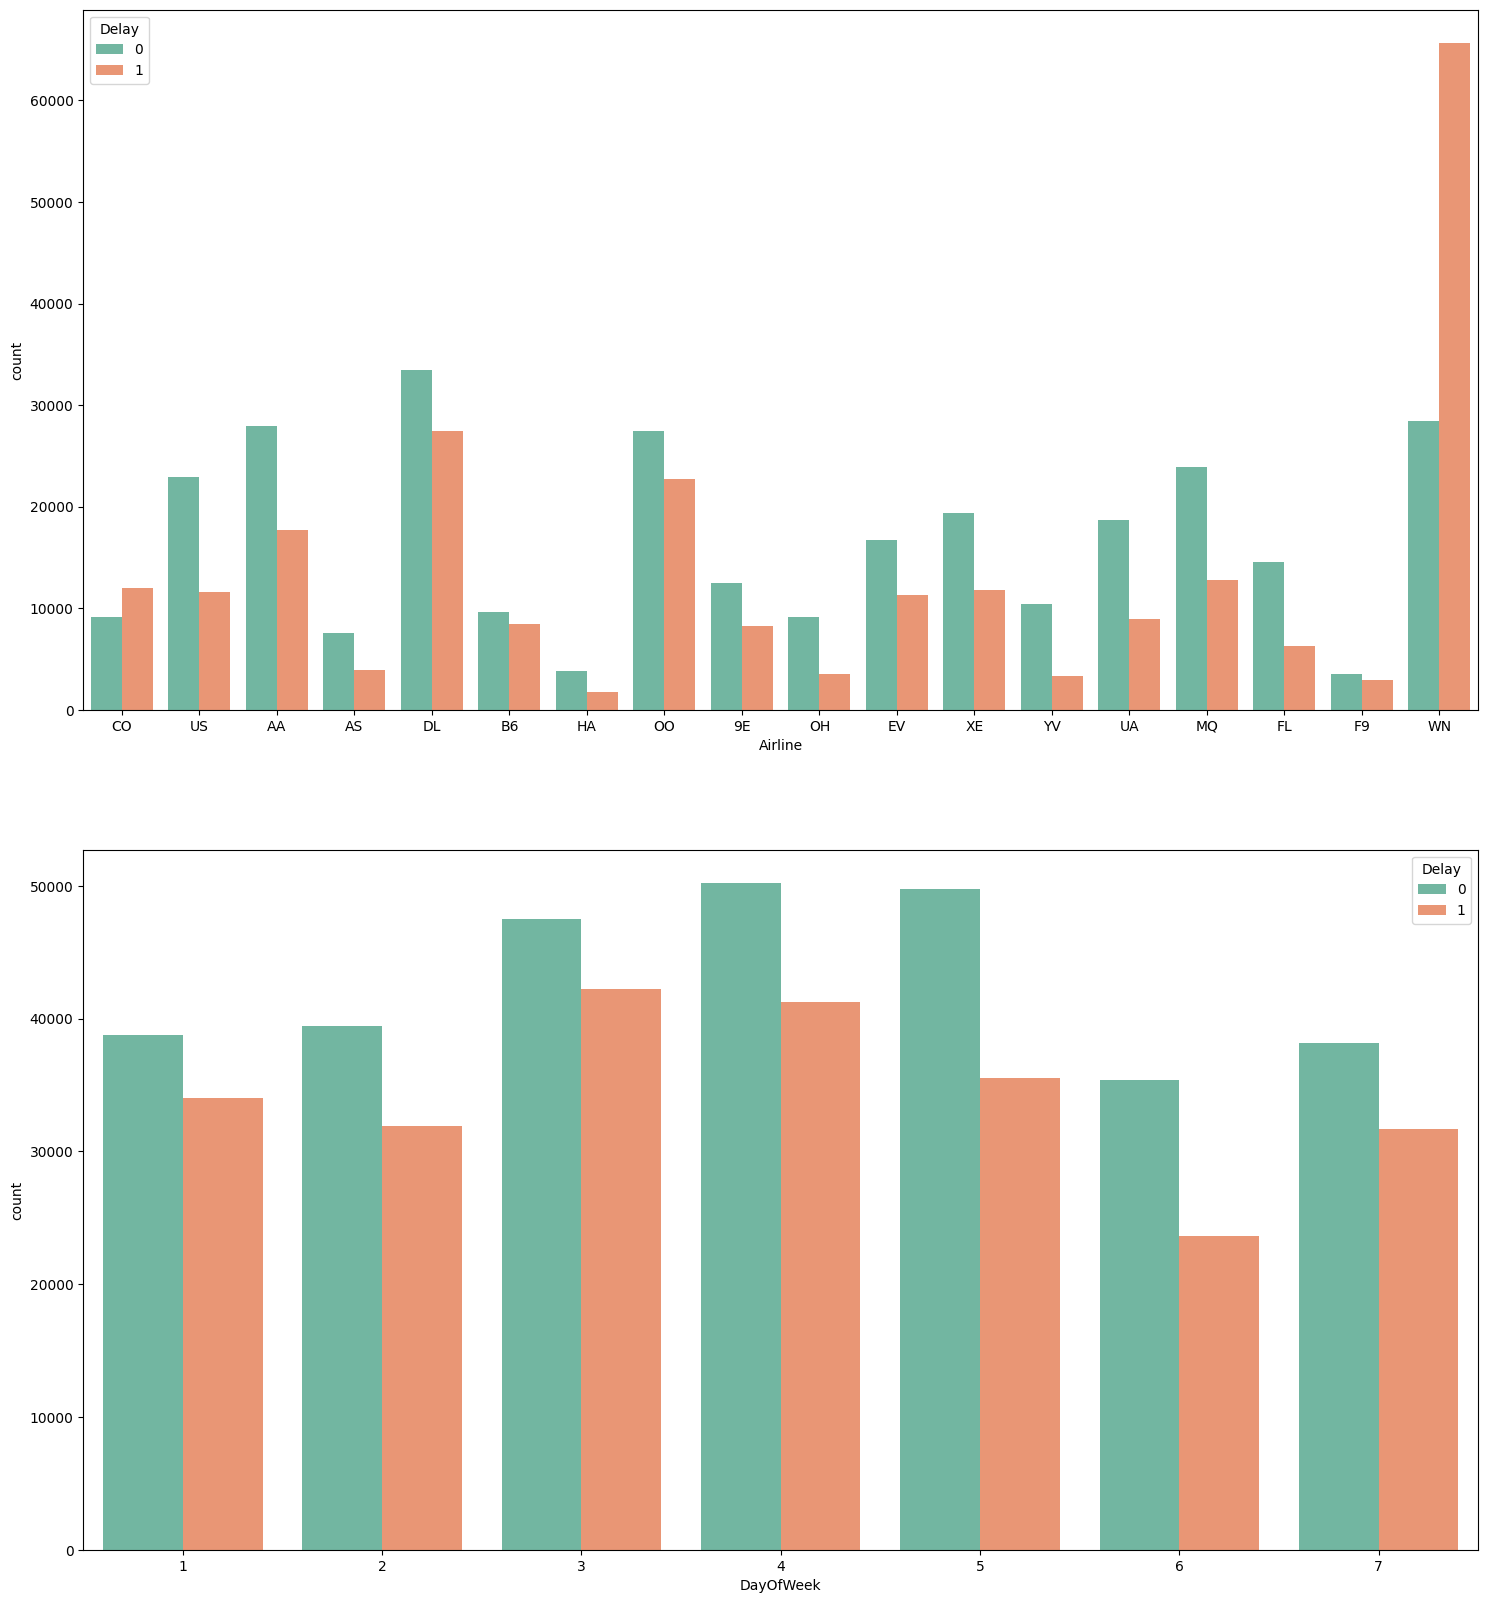

In [11]:
plt.figure(figsize = (18,20))

plt.subplot(2,1,1)
sns.countplot(x = 'Airline', hue= 'Delay', palette='Set2', data = df)

plt.subplot(2,1,2)
sns.countplot(x = 'DayOfWeek', hue= 'Delay', palette='Set2', data = df)

In [12]:
cols = df.columns
for i in range(0,len(cols)):
    print(df[cols[i]].value_counts(),'\n')
    print('********************************************\n')

id
1         1
359600    1
359598    1
359597    1
359596    1
         ..
179791    1
179790    1
179789    1
179788    1
539383    1
Name: count, Length: 539383, dtype: int64 

********************************************

Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64 

********************************************

Flight
16      420
5       407
9       401
8       396
62      364
       ... 
7814      1
3573      1
4385      1
3292      1
6969      1
Name: count, Length: 6585, dtype: int64 

********************************************

AirportFrom
ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64 

********************************************

AirportT

In [13]:
le = preprocessing.LabelEncoder()
le

LabelEncoder()

In [14]:
df['Airline'] = le.fit_transform(df['Airline'])
df['Airline'].unique()

array([ 4, 14,  1,  2,  5,  3,  9, 12,  0, 11,  6, 16, 17, 13, 10,  8,  7,
       15])

# Encoding

In [15]:
le = preprocessing.LabelEncoder()

df['Airline'] = le.fit_transform(df['Airline'])
df['AirportFrom'] = le.fit_transform(df['AirportFrom'])
df['AirportTo'] = le.fit_transform(df['AirportTo'])

In [16]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,4,269,253,135,3,15,205,1
1,2,14,1558,217,60,3,15,222,1
2,3,1,2400,154,80,3,20,165,1
3,4,1,2466,253,80,3,20,195,1
4,5,2,108,14,252,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,4,178,203,264,5,1439,326,0
539379,539380,8,398,252,16,5,1439,305,0
539380,539381,8,609,253,184,5,1439,255,0
539381,539382,13,78,128,253,5,1439,313,1


# Corelation matrix

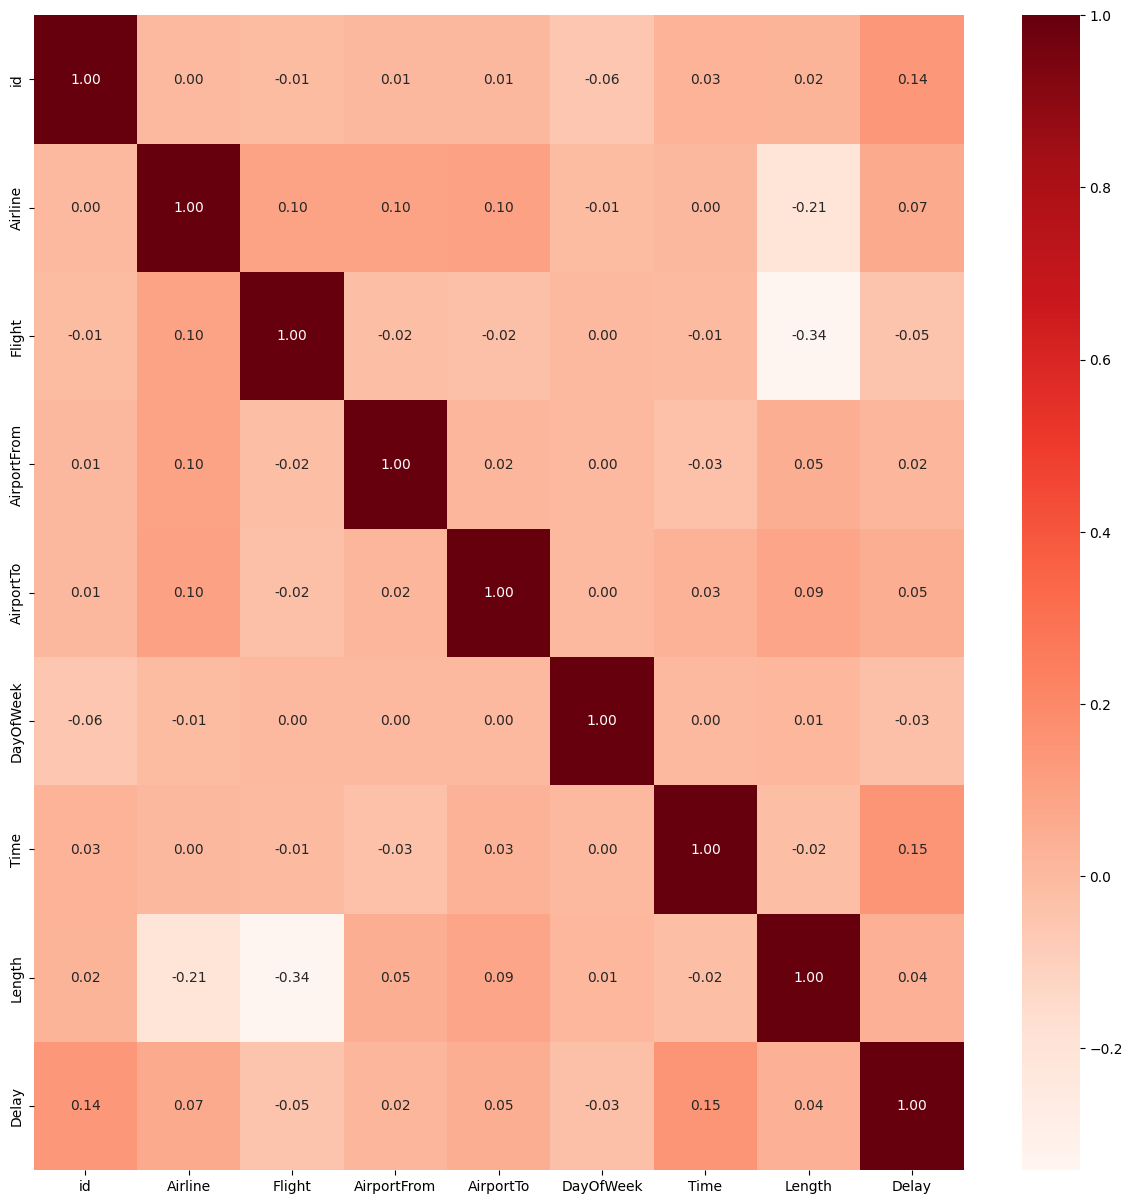

In [17]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [18]:
target = 'Delay'
features = ['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length']

X = df[features]
y = df[target]

In [35]:
y.value_counts()

Delay
0    299119
1    240264
Name: count, dtype: int64

# train, test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# RandomForest Classifier

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred_normal_rf = model.predict(X_test)

In [22]:
y_pred_normal_rf

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_normal_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_normal_rf))

Confusion Matrix:
 [[39881 19943]
 [21387 26666]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66     59824
           1       0.57      0.55      0.56     48053

    accuracy                           0.62    107877
   macro avg       0.61      0.61      0.61    107877
weighted avg       0.62      0.62      0.62    107877



# Variable RandomForest Classifier

In [24]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,                # prune depth
    min_samples_split=10,        # fewer splits
    min_samples_leaf=5,          # more data per leaf
    max_leaf_nodes=20,           # limit leaves
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=20, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

# Cross validation

In [25]:
scores = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')
print("CV F1-macro scores:", scores)
print("Mean F1-macro:", scores.mean())


CV F1-macro scores: [0.56866673 0.56636657 0.52268356 0.54463731 0.5466214 ]
Mean F1-macro: 0.5497951141885478


In [26]:
y_pred_cross_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_cross_rf))
print(classification_report(y_test, y_pred_cross_rf))

[[55002  4822]
 [34838 13215]]
              precision    recall  f1-score   support

           0       0.61      0.92      0.74     59824
           1       0.73      0.28      0.40     48053

    accuracy                           0.63    107877
   macro avg       0.67      0.60      0.57    107877
weighted avg       0.67      0.63      0.59    107877



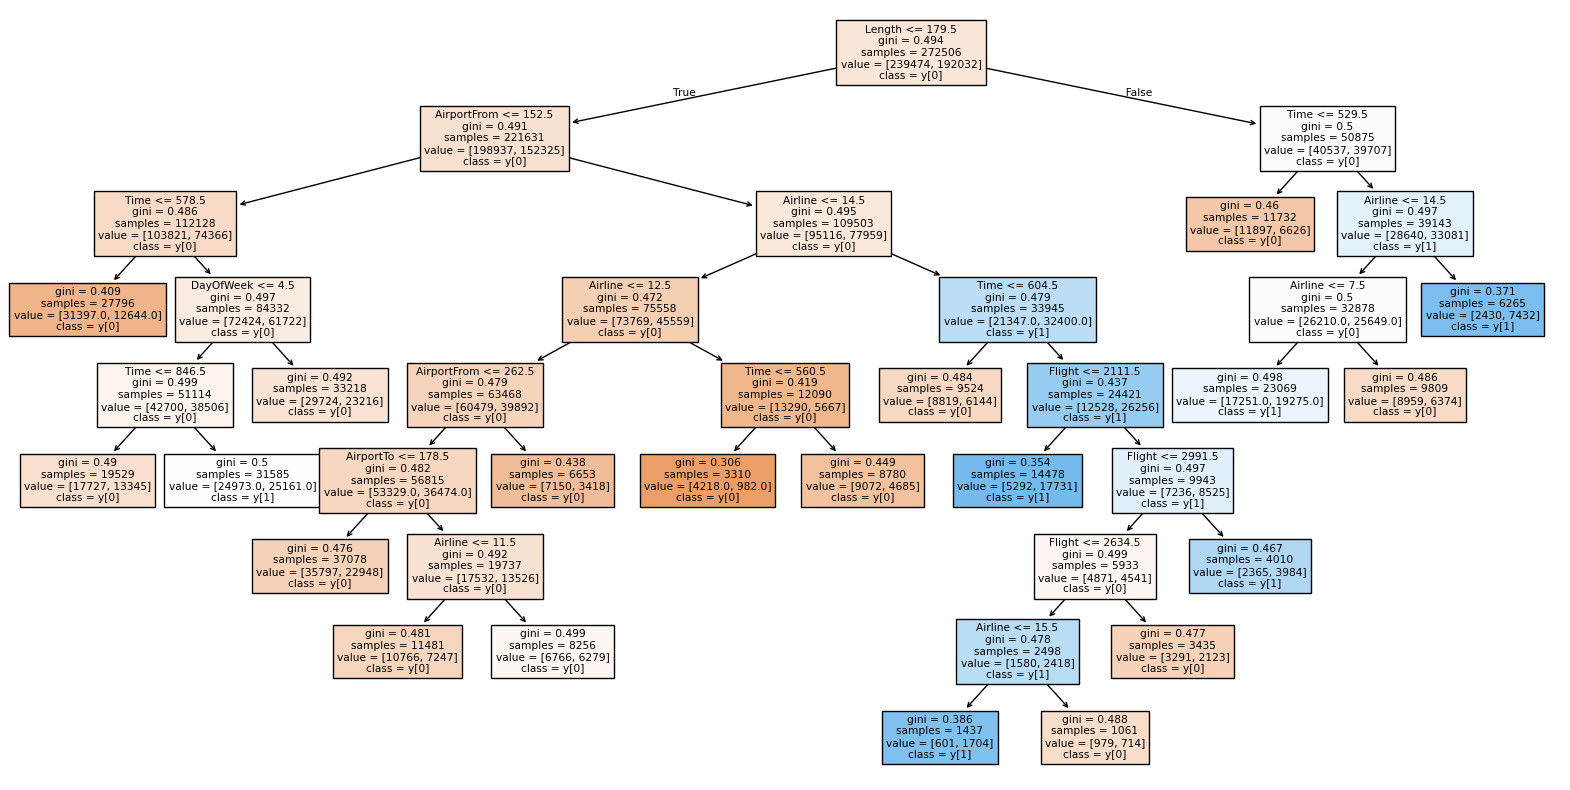

In [27]:
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=True, filled=True)
plt.show()


# Hyper parameter tuning

In [28]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'n_estimators': [50, 100]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, 
                    cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [29]:
# Extract best parameters
best_params = grid.best_params_

# Create a new model using these parameters
best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Fit the model
best_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_hyper_parameter_tuning = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_hyper_parameter_tuning))
print(classification_report(y_test, y_pred_hyper_parameter_tuning))

[[48344 11480]
 [24228 23825]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73     59824
           1       0.67      0.50      0.57     48053

    accuracy                           0.67    107877
   macro avg       0.67      0.65      0.65    107877
weighted avg       0.67      0.67      0.66    107877



There is a imbalance in the data 

In [36]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(10))

Airline        0.271818
Time           0.237625
Flight         0.139231
Length         0.114727
AirportFrom    0.089732
AirportTo      0.080189
DayOfWeek      0.066677
dtype: float64


# After oversampling with SMOTE 

Types can be tried:

# Handle Class Imbalance (Very Important)
rf = RandomForestClassifier(class_weight='balanced', random_state=42, **best_params)
rf.fit(X_train, y_train)


# Tune Decision Threshold
y_proba = best_rf.predict_proba(X_test)[:, 1]
import numpy as np
y_pred_thresh = (y_proba >= 0.4).astype(int)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))


# Feature Importance Analysis
import pandas as pd
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(10))


#Try Gradient Boosting Models
from xgboost import XGBClassifier
xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb.fit(X_train, y_train)


# Cross-Validation Focused on F1 for Class 1
from sklearn.metrics import make_scorer, f1_score
f1_class1 = make_scorer(f1_score, pos_label=1)
grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring=f1_class1, cv=5)




In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [39]:
# 3. Define parameter grid
param_grid_balanced = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'n_estimators': [50, 100]
}

# 4. Grid Search with Cross-Validation
grid_balanced = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_balanced,
                    cv=5, scoring='f1_macro', n_jobs=-1)

grid_balanced.fit(X_resampled, y_resampled)

# 5. Use best parameters to train final model
best_params_balanced = grid_balanced.best_params_

final_model_balanced = RandomForestClassifier(
    n_estimators=best_params_balanced['n_estimators'],
    max_depth=best_params_balanced['max_depth'],
    min_samples_split=best_params_balanced['min_samples_split'],
    min_samples_leaf=best_params_balanced['min_samples_leaf'],
    random_state=42
)

final_model_balanced.fit(X_resampled, y_resampled)

# 6. Predict and evaluate on original test set
y_pred_balanced =  final_model_balanced.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))

Confusion Matrix:
 [[41525 18299]
 [18386 29667]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69     59824
           1       0.62      0.62      0.62     48053

    accuracy                           0.66    107877
   macro avg       0.66      0.66      0.66    107877
weighted avg       0.66      0.66      0.66    107877

